# Customer Personality Analysis for Marketing Campaign
---

Exploratory Data Analysis Excercise conducted by **Widya Ayuningtyas**



> Problem Statement

  Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

>  Objective

* Finding loyal customer & customer category by total spent and number of purchase.
* Find most purchased product by group of customers.
* Find Which places are getting the most purchase by group of customers.

> Restriction

* Loyal customer description are customer with highest spent amount or highest purchase number 
* Not using data in promotion data category as it is irrelevant to objective or could be used in next excercise.

> Methodology

* Descriptive Analysis
* Sum Analysis

> Included Packages

* Pandas
* Numpy

> Expected Outcome

* Categorized customer by features
* Loyal customer by customer category
* Most purchased products by customer category
* Most visited store by customer category

> Steps are as following :


## **Data Understanding**
---

Source : The dataset for this project is provided by Dr. Omar Romero-Hernandez.
https://www.kaggle.com/imakash3011/customer-personality-analysis

Marketing Campaign Data has 29 features each are grouped into 4 information category below :

1. **Customer**
* ID: Customer's unique identifierYear_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
2. **Products**
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years
3. **Promotion**
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
4. **Place**
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month


  Unknown Variable
* Z_CostContact : constant value for all row
* Z_Revenue : constant value for all row

## Data Preparation
---




### Installing Packages

In [1]:
# Standard Library
import pandas as pd
import numpy as np                             
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Importing Data

In [125]:
data = pd.read_csv('/content/marketing_campaign.csv', sep="\t")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Exploratory Data Analysis
---

> Data Shape



In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

| **Observation from the data** | **Decision** |
| -- | -- |
| Has 2240 data samples with 29 attributes | -
| Has 24 missing value from Income feature | 1.07% of total data, as we can't confirming nor collect the missing data, we can drop 24 missing data.
| Dt_Customer collumn has object type instead of datetime | change data type
| Has 2 unknown attributes Z which have constant value for all | these two columns are irrelevant and can be dropped



In [127]:
# Drop 24 missing data
data = data.dropna()

# Change data type of Dt_Customer
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])

# Dropping 2 unknown collumn Z
data = data.drop(['Z_Revenue', 'Z_CostContact'], axis = 1)

In [128]:
# Here we can see now we have 27 collumn with 2216 non-null value, Dt_Customer data type has changed, and 2 unknown collumn dropped
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-nul

> Descriptive Analysis

For analysis, we want to do some adjustment to some categorical feature, such as :


| **Collumn Adjusted** | **From** | **Purpose** |
| -- | -- | -- |
| Age_Cat | Year_Birth | Categorizing customer by age range
| Income_Type | Income | Categorizing customer by income
| Total_Spent | total amount spent on all product category | Finding loyal customer and customer category
| Total_Purch | total purchase number from all market places | Finding loyal customer and customer category
| Family_Size | Marital_Status, KidHome, TeenHome | count family member in customer's house


In [131]:
# Add Age_Cat by counting age from year of birth data
data['Age'] = 2022 - data['Year_Birth']
data['AgeRange'] = pd.cut(data['Age'],
                        bins=[0,30,50,130],
                        labels=['Young Adult','Adult','Old'])

# Add Income_cat by Income
data['IncomeType'] = pd.cut(
                          data['Income'],
                          bins=[0,35000,50000,70000,700000],
                          labels=['Low','Medium','High','Very High'])

# Add Total_Spent from all product category
data['Total_Spent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

# Add Total_Purch from all market place
data['Total_Purch'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']

# Add Family_Size from marital_status, kidhome and teenhome
data['Marital_Status'] = data['Marital_Status'].replace({"Married":"InRelation", "Together":"InRelation", "Absurd":"Single", "Widow":"Single", "YOLO":"Single", "Divorced":"Single", "Alone":"Single",})
data['Relationship'] = data["Marital_Status"].replace({"Single": 1, "InRelation":2})
data['Relationship'] = [int(x) for x in data['Relationship']]
data['Child'] = data['Kidhome'] + data['Teenhome']
data["Family_Size"] = data["Relationship"] + data["Child"]


In [132]:
data.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AgeRange,IncomeType,Total_Spent,Total_Purch,Relationship,Child,Family_Size
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,65,Old,High,1617,22,1,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,68,Old,Medium,27,4,1,2,3


In [133]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


Here what we can analyize from data descriptive information above :
* Customer age has range from 26 to 129
* Income has range from $1.730 to 666.666
* By means, we can see that the most purchased product are wines and meats product.
* By means, we also can see that the most purchased product are come from Store

### Loyal Customer by Customer Category

> Data Visualization for Total Spent & Total Purch by Age Range, IncomeType & FamilySize



Text(0.5, 1.0, 'Total Purchase Number by Education')

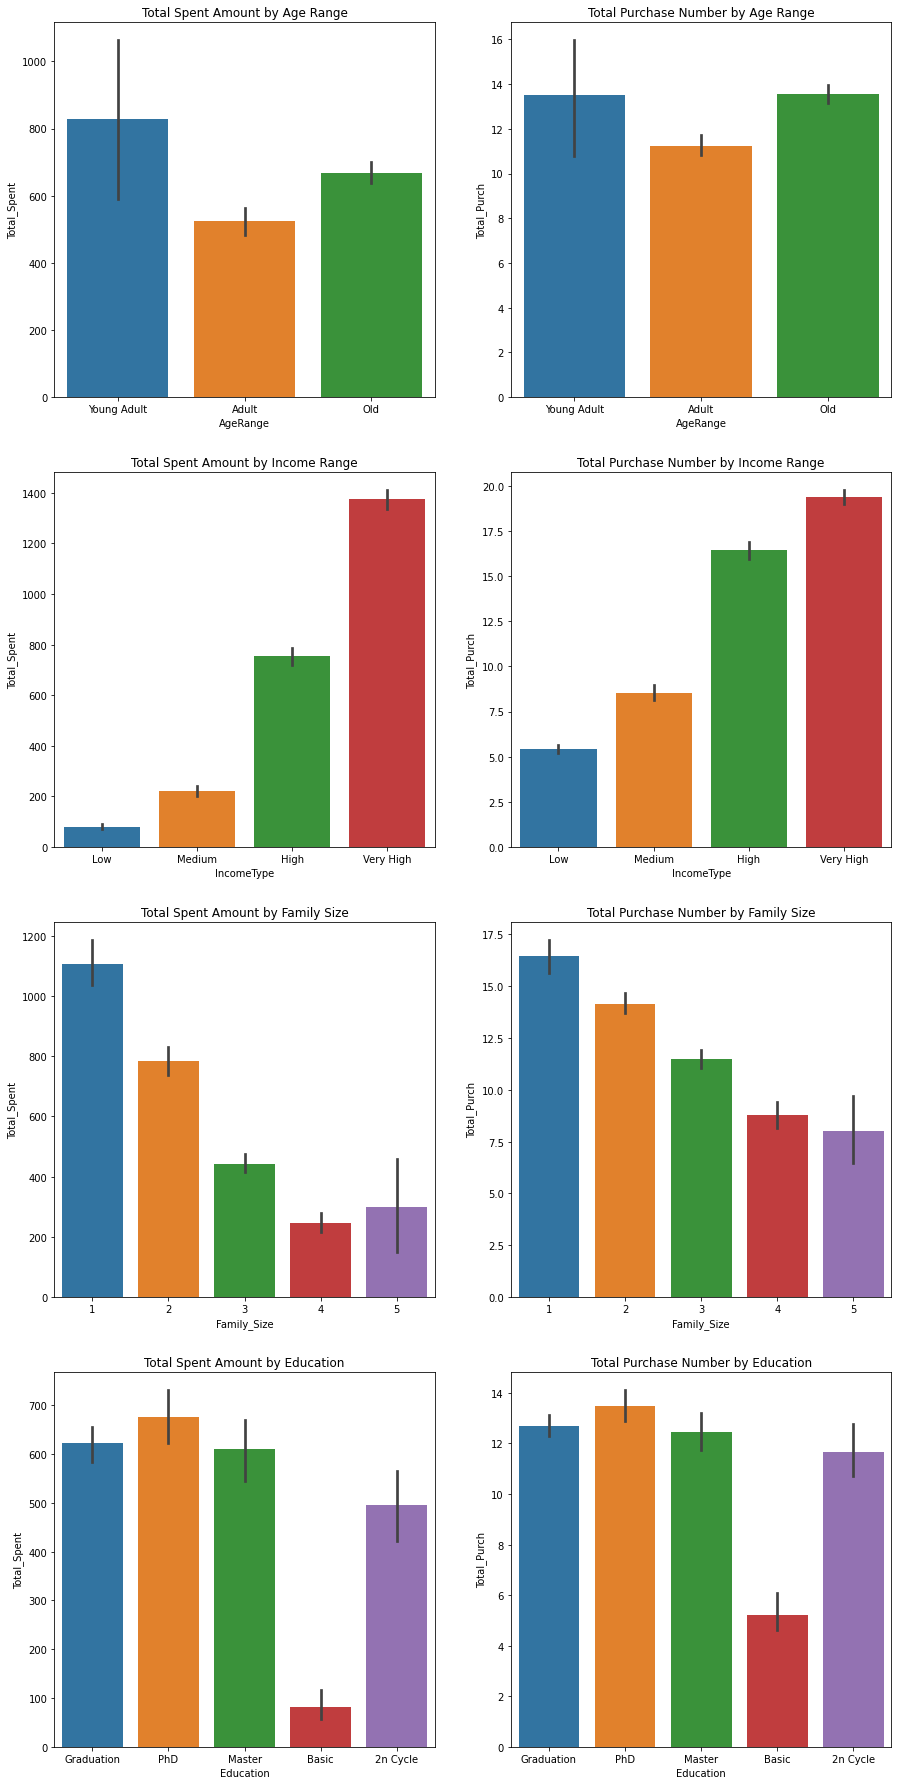

In [134]:
plt.figure(figsize=(15,40))

#Total Spent by Age Range
plt.subplot(5,2,1)
sns.barplot(x = "AgeRange",
            y = "Total_Spent",
            data = data)
plt.title("Total Spent Amount by Age Range")

#Total Purch by Age Range
plt.subplot(5,2,2)
sns.barplot(x = "AgeRange",
            y = "Total_Purch",
            data = data)
plt.title("Total Purchase Number by Age Range")

#Total Spent by IncomeType
plt.subplot(5,2,3)
sns.barplot(x = "IncomeType",
            y = "Total_Spent",
            data = data)
plt.title("Total Spent Amount by Income Range")

#Total Purch by IncomeType
plt.subplot(5,2,4)
sns.barplot(x = "IncomeType",
            y = "Total_Purch",
            data = data)
plt.title("Total Purchase Number by Income Range")

#Total Spent by Family_Size
plt.subplot(5,2,5)
sns.barplot(x = "Family_Size",
            y = "Total_Spent",
            data = data)
plt.title("Total Spent Amount by Family Size")

#Total Purch by Family Size
plt.subplot(5,2,6)
sns.barplot(x = "Family_Size",
            y = "Total_Purch",
            data = data)
plt.title("Total Purchase Number by Family Size")

#Total Spent by Education
plt.subplot(5,2,7)
sns.barplot(x = "Education",
            y = "Total_Spent",
            data = data)
plt.title("Total Spent Amount by Education")

#Total Purch by Family Size
plt.subplot(5,2,8)
sns.barplot(x = "Education",
            y = "Total_Purch",
            data = data)
plt.title("Total Purchase Number by Education")


**As we can see from the plot above :**

There are only slight difference pattern when we comparing total spent amount and total purchase by customer category
1. Highest totalspent and purchasenumber by age category are coming from young adult category
2. Highest totalspent and purchasenumber by income range are coming from very high income category
3. Highest totalspent and purchasenumber by family size are coming from the customer with least family member
4. Highest totalspent and purchasenumber by education are coming from the customer with PhD


**BUT**

We want to see which customer are spending the most and purchasing the most, what can do :
* See total spent data distribution to set limit value for loyal customer
* See top spender by filtering total spend amount

### Loyal Customer

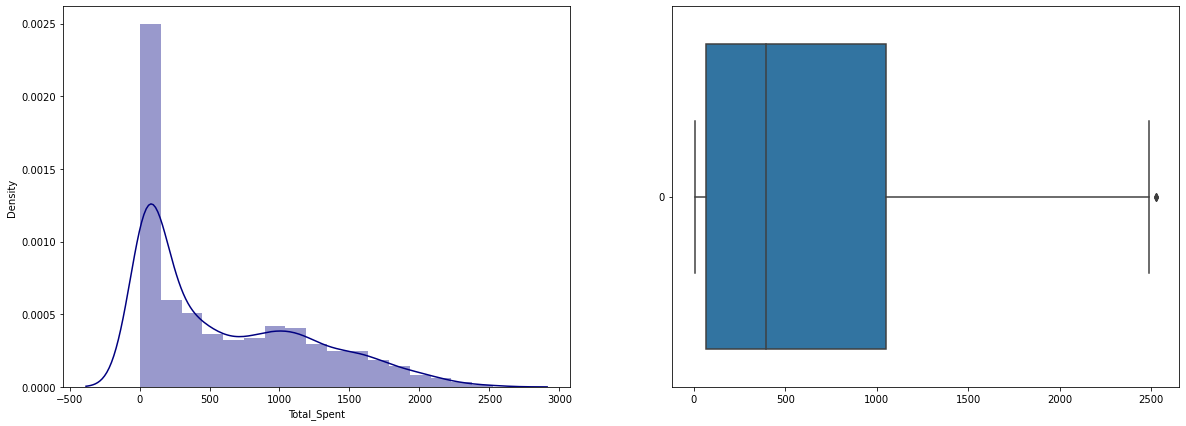

In [135]:
# Boxplot for total Spent
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.distplot(data['Total_Spent'],color='navy')

plt.subplot(1,2,2)
sns.boxplot(data = data["Total_Spent"], 
            orient="h")

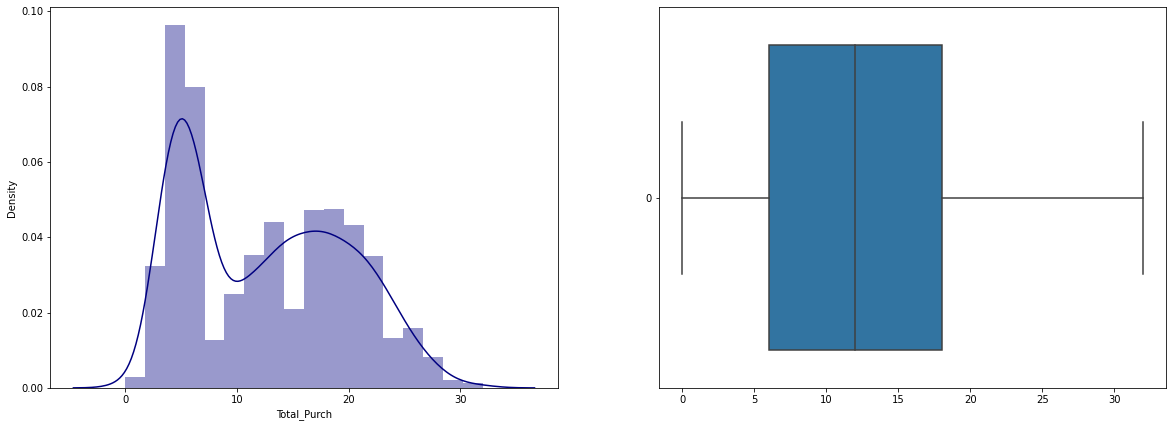

In [136]:
# Boxplot for total Purch
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
sns.distplot(data['Total_Purch'],color='navy')

plt.subplot(1,2,2)
sns.boxplot(data = data["Total_Purch"], 
            orient="h")

As we can see from the plot above we can select top n loyal customer by total spent above 2000 and total purchase above 20

In [137]:
#top 10 loyal customer
data[(data['Total_Spent'] > 2000) & (data['Total_Purch'] > 20)].sort_values(by='Total_Spent',ascending=False).head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AgeRange,IncomeType,Total_Spent,Total_Purch,Relationship,Child,Family_Size
1492,1763,1988,Graduation,InRelation,87679.0,0,0,2013-07-27,62,1259,172,815,97,148,33,1,7,11,10,4,1,0,1,1,0,0,1,34,Adult,Very High,2524,28,2,0,2
987,4580,1969,Graduation,InRelation,75759.0,0,0,2013-10-25,46,1394,22,708,89,91,182,1,9,7,9,5,1,0,1,1,0,0,1,53,Old,Very High,2486,25,2,0,2
1052,4475,1949,PhD,InRelation,69098.0,0,0,2013-02-16,82,1315,22,780,145,0,178,1,7,8,9,5,0,0,0,0,0,0,0,73,Old,High,2440,24,2,0,2
1601,5453,1956,Master,InRelation,90226.0,0,0,2012-09-26,26,1083,108,649,253,151,108,1,4,7,12,2,0,0,0,1,0,0,0,66,Old,Very High,2352,23,2,0,2
1458,10133,1970,Graduation,Single,93790.0,0,0,2014-12-02,16,1302,68,731,89,114,45,0,6,7,12,2,0,1,1,1,0,0,1,52,Old,Very High,2349,25,1,0,1
1288,9010,1972,Master,InRelation,83151.0,0,0,2013-10-02,80,968,147,842,137,42,210,1,5,7,10,2,1,0,1,1,0,0,1,50,Adult,Very High,2346,22,2,0,2
1444,1553,1946,Graduation,InRelation,82657.0,0,0,2013-09-27,71,966,168,672,246,105,126,1,7,5,10,4,0,1,0,1,0,0,0,76,Old,Very High,2283,22,2,0,2
1259,2147,1969,Graduation,InRelation,76653.0,0,0,2013-08-16,91,736,63,946,219,189,126,1,4,7,11,2,0,0,1,1,0,0,0,53,Old,Very High,2279,22,2,0,2
1869,2186,1977,2n Cycle,InRelation,82326.0,0,0,2014-10-03,30,938,142,754,159,81,183,1,5,10,6,2,0,1,1,1,0,0,1,45,Adult,Very High,2257,21,2,0,2
1992,6248,1947,Master,Single,91712.0,0,0,2013-10-17,47,1276,24,746,94,29,48,0,9,7,11,3,0,0,1,0,0,0,1,75,Old,Very High,2217,27,1,0,1


### Which Product are purchased the most by Customer Categories

Here we want to know the most purchased products by customer category

In [143]:
#Age Range
df1 = data.groupby(["AgeRange"])["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"].sum().reset_index()
df1.head()

,AgeRange,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Young Adult,8646,1093,8801,1882,1115,1647
1,Adult,236488,23569,147975,33134,24555,38242
2,Old,430949,33743,213287,48389,34226,57538


By age range, the most purchased product by :

*   YoungAdult : Meat
*   Adult : Wines
*   Old : Wines





In [ ]:
#IncomeType
df2 = data.groupby(["IncomeType"])["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"].sum().reset_index()
df2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,IncomeType,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Low,11707,3262,12237,4709,3198,8915
1,Medium,59998,3995,23950,6738,4225,13990
2,High,278701,19703,108238,26528,18500,37310
3,Very High,325677,31445,225638,45430,33973,37212


By income type, the most purchased product are :

*   Low : Meat
*   Medium : Wines
*   High : Wines
*   Very High : Wines



In [149]:
df3 = data.groupby(["Family_Size"])["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"].sum().reset_index()
df3.head()

,Family_Size,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,1,123782,13180,93570,18730,13525,16235
1,2,284002,27404,175833,40008,27350,39718
2,3,218975,15287,83748,21310,16380,34108
3,4,43157,2339,14944,3143,2520,6761
4,5,6167,195,1968,214,121,605


By family size, the most purchased product by :

1. Wines
2. Wines
3. Wines
4. Wines
5. Wines


In [150]:
df4 = data.groupby(["Education"])["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"].sum().reset_index()
df4.head()

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,2n Cycle,40169,5872,27016,9608,6945,9376
1,Basic,391,600,618,921,654,1233
2,Graduation,318111,34441,201319,48453,34915,56563
3,Master,121538,7802,59466,11495,7595,14669
4,PhD,195874,9690,81644,12928,9787,15586


By education, the most purchased product by :

*   2n Cycle : Wines
*   Basic : Gold
*   Graduation : Wines
*   Master : Wines
*   PhD : Wines

### Which places are getting the most purchase

In [151]:
df5 = data.groupby(["AgeRange"])["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"].sum().reset_index()
df5.head()

,AgeRange,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,Young Adult,96,117,165
1,Adult,3528,2173,5130
2,Old,5429,3629,7560


By age range, the place getting the most purchase are : 

*   Yound Adult : Store
*   Adult : Store
*   Old : Store


In [152]:
df6 = data.groupby(["IncomeType"])["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"].sum().reset_index()
df6.head()

,IncomeType,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,Low,1098,259,1623
1,Medium,1681,572,2101
2,High,3605,2131,4913
3,Very High,2669,2957,4218


By income type, the place getting the most purchase are :

*   Low : Store
*   Medium : Store
*   High : Store
*   Very High : Store



In [153]:
df7 = data.groupby(["Family_Size"])["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"].sum().reset_index()
df7.head()

,Family_Size,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,1,1119,1166,1858
1,2,3263,2651,4807
2,3,3624,1748,4750
3,4,949,321,1323
4,5,98,33,117


By family size, the place getting the most purchase are : 

1. Store
2. Store
3. Store
4. Store
5. Store



In [154]:
df8 = data.groupby(["Education"])["NumWebPurchases","NumCatalogPurchases","NumStorePurchases"].sum().reset_index()
df8.head()

,Education,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,2n Cycle,753,471,1112
1,Basic,102,26,154
2,Graduation,4593,3056,6519
3,Master,1473,929,2149
4,PhD,2132,1437,2921


By age range, the place getting the most purchase are : 

*   2n Cycle : Store
*   Basic : Store
*   Graduation : Store
*   Master : Store
*   PhD : Store